In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud
from collections import defaultdict
import seaborn as sns
import nltk 
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/NLP2/data/train_all_tasks.csv')

In [ ]:
train_data

,rewire_id,text,label_sexist,label_category,label_vector
0,sexism2022_english-7358,"Damn, this writing was pretty chaotic",not sexist,none,none
1,sexism2022_english-2367,"Yeah, and apparently a bunch of misogynistic v...",not sexist,none,none
2,sexism2022_english-3073,How the FUCK is this woman still an MP!!!???,not sexist,none,none
3,sexism2022_english-14895,Understand. Know you're right. At same time I ...,not sexist,none,none
4,sexism2022_english-4118,Surprized they didn't stop and rape some women,not sexist,none,none
...,...,...,...,...,...
13995,sexism2022_english-14185,complexes like the 'nice chicks' that go after...,sexist,2. derogation,2.1 descriptive attacks
13996,sexism2022_english-18629,"""GRAPHIC Germany - Muslim ""refugee"" stabbing h...",not sexist,none,none
13997,sexism2022_english-3320,Lol I imagine there would be simps that are li...,not sexist,none,none
13998,sexism2022_english-13309,"It's not, the girls I go on dates with don't k...",not sexist,none,none


# Duplicates & Missing values

### There are no duplicates and missing values (for text).

In [ ]:
print(f'Training set shape: {train_data.shape}')
train_data.drop_duplicates()
print(f'Training set shape after removing duplicates: {train_data.shape}')
bool_series_train = pd.isnull(train_data["text"]) 
print(f'Location missing values for train dataset: {train_data[bool_series_train].shape}')


Training set shape: (14000, 5)
Training set shape after removing duplicates: (14000, 5)
Location missing values for train dataset: (0, 5)


# Number of labels



### Task A - 2 categories

In [ ]:
print(train_data['label_sexist'].unique())
train_data['label_sexist'].value_counts()

['not sexist' 'sexist']


not sexist    10602
sexist         3398
Name: label_sexist, dtype: int64

### Task B - 4 categories

In [ ]:
print(train_data['label_category'].unique())
train_data['label_category'].value_counts()

['none' '2. derogation' '1. threats, plans to harm and incitement'
 '3. animosity' '4. prejudiced discussions']


none                                        10602
2. derogation                                1590
3. animosity                                 1165
4. prejudiced discussions                     333
1. threats, plans to harm and incitement      310
Name: label_category, dtype: int64

### Task c - 11 categories

In [ ]:
print(train_data['label_vector'].unique())
train_data['label_vector'].value_counts()

['none' '2.3 dehumanising attacks & overt sexual objectification'
 '2.1 descriptive attacks' '1.2 incitement and encouragement of harm'
 '3.1 casual use of gendered slurs, profanities, and insults'
 '4.2 supporting systemic discrimination against women as a group'
 '2.2 aggressive and emotive attacks'
 '3.2 immutable gender differences and gender stereotypes'
 '3.4 condescending explanations or unwelcome advice'
 '3.3 backhanded gendered compliments'
 '4.1 supporting mistreatment of individual women' '1.1 threats of harm']


none                                                               10602
2.1 descriptive attacks                                              717
2.2 aggressive and emotive attacks                                   673
3.1 casual use of gendered slurs, profanities, and insults           637
3.2 immutable gender differences and gender stereotypes              417
4.2 supporting systemic discrimination against women as a group      258
1.2 incitement and encouragement of harm                             254
2.3 dehumanising attacks & overt sexual objectification              200
4.1 supporting mistreatment of individual women                       75
3.3 backhanded gendered compliments                                   64
1.1 threats of harm                                                   56
3.4 condescending explanations or unwelcome advice                    47
Name: label_vector, dtype: int64

# Stopwords

In [ ]:
STOP_WORDS = set(stopwords.words('english'))

def most_common_stopwords(sentiment, df, task_label, SENT_TO_COLOR):
  word_vecs = df[df[task_label] == sentiment]['text'].str.split()
  stops_count = defaultdict(int)
  for words in word_vecs:
    for word in words:
      if word in STOP_WORDS:
        stops_count[word] += 1
  
  stops_count = sorted(stops_count.items(), key= lambda x: x[1], reverse=True)
  #selecting the first 10
  stops_count = stops_count[:10]
  x, y = zip(*stops_count)
  plt.bar(x, y, color=SENT_TO_COLOR[sentiment])
  plt.title(sentiment)
  plt.show()


### Task A

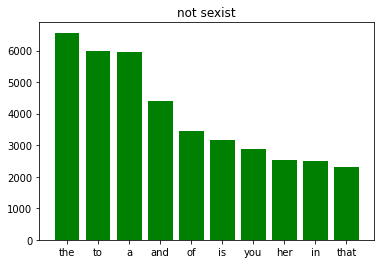

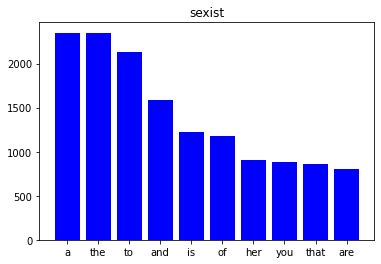

In [ ]:
SENT_TO_COLOR_TASKA = {
    'not sexist':'#008000',
    'sexist':'#0000FF',
}
for sentiment in SENT_TO_COLOR_TASKA:
  most_common_stopwords(sentiment, train_data, 'label_sexist', SENT_TO_COLOR_TASKA)

### TASK B

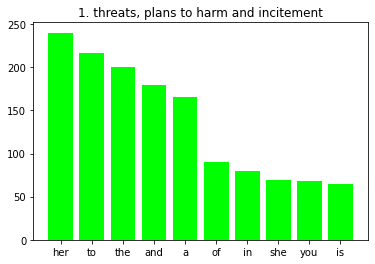

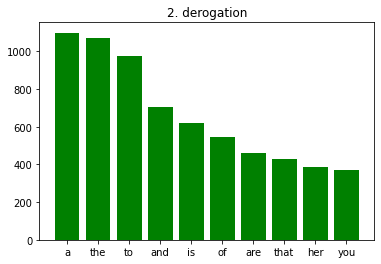

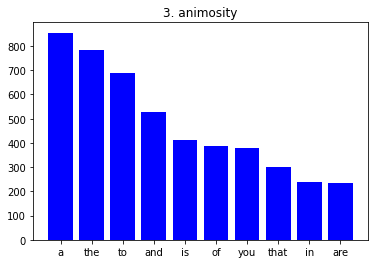

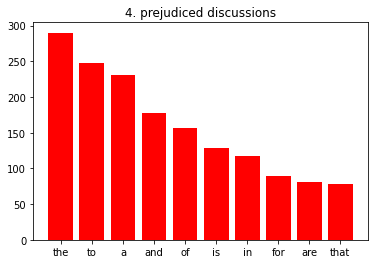

In [ ]:
SENT_TO_COLOR_TASKB = {
    '1. threats, plans to harm and incitement': '#00FF00',
    '2. derogation':'#008000',
    '3. animosity':'#0000FF',
    '4. prejudiced discussions': '#FF0000'
}

for sentiment in SENT_TO_COLOR_TASKB:
  most_common_stopwords(sentiment, train_data, 'label_category', SENT_TO_COLOR_TASKB)

# Number of characters

In [ ]:
train_data['number_characters'] = train_data['text'].apply(lambda x: len(x.replace("\d| |\n", "")))

### Task A

Text(0.5, 1.0, 'Not sexist label')

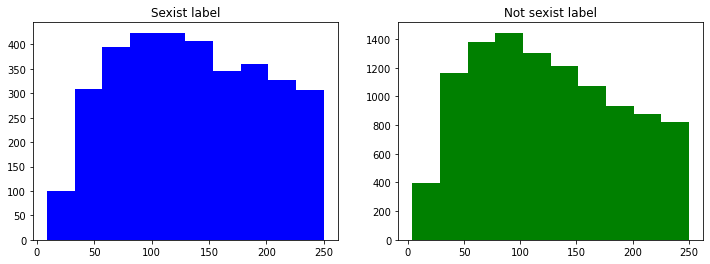

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,4))


text_sexist = train_data[train_data['label_sexist'] == 'sexist']['number_characters']

ax1.hist(text_sexist,color=SENT_TO_COLOR_TASKA['sexist'], density=False)
ax1.set_title('Sexist label')


text_not_sexist = train_data[train_data['label_sexist'] == 'not sexist']['number_characters']

ax2.hist(text_not_sexist,color=SENT_TO_COLOR_TASKA['not sexist'], density=False)
ax2.set_title('Not sexist label')



### Task B

Text(0.5, 1.0, '4. prejudiced discussions')

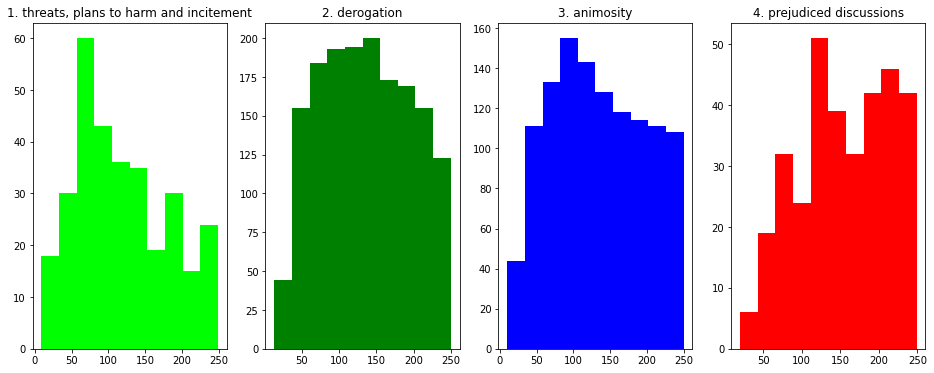

In [ ]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(16,6))


cat1 = train_data[train_data['label_category'] == '1. threats, plans to harm and incitement']['number_characters']
ax1.hist(cat1,color=SENT_TO_COLOR_TASKB['1. threats, plans to harm and incitement'], density=False)
ax1.set_title('1. threats, plans to harm and incitement')


cat2 = train_data[train_data['label_category'] == '2. derogation']['number_characters']
ax2.hist(cat2,color=SENT_TO_COLOR_TASKB['2. derogation'], density=False)
ax2.set_title('2. derogation')

cat3 = train_data[train_data['label_category'] == '3. animosity']['number_characters']
ax3.hist(cat3,color=SENT_TO_COLOR_TASKB['3. animosity'], density=False)
ax3.set_title('3. animosity')


cat4 = train_data[train_data['label_category'] == '4. prejudiced discussions']['number_characters']
ax4.hist(cat4,color=SENT_TO_COLOR_TASKB['4. prejudiced discussions'], density=False)
ax4.set_title('4. prejudiced discussions')



# Number of words

In [ ]:
train_data['number_words'] = train_data['text'].apply(lambda x: len(x.split()))

### Task A

Text(0.5, 1.0, 'Not sexist label')

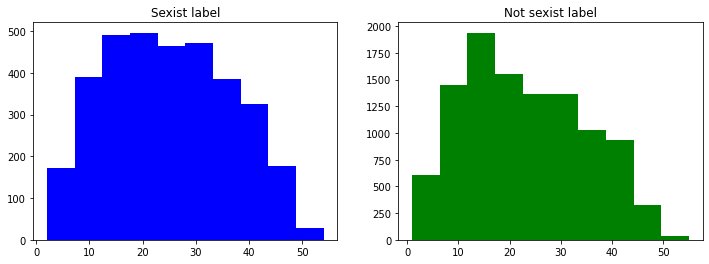

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,4))


text_sexist = train_data[train_data['label_sexist'] == 'sexist']['number_words']

ax1.hist(text_sexist,color=SENT_TO_COLOR_TASKA['sexist'], density=False)
ax1.set_title('Sexist label')


text_not_sexist = train_data[train_data['label_sexist'] == 'not sexist']['number_words']

ax2.hist(text_not_sexist,color=SENT_TO_COLOR_TASKA['not sexist'], density=False)
ax2.set_title('Not sexist label')



### Task B

Text(0.5, 1.0, '4. prejudiced discussions')

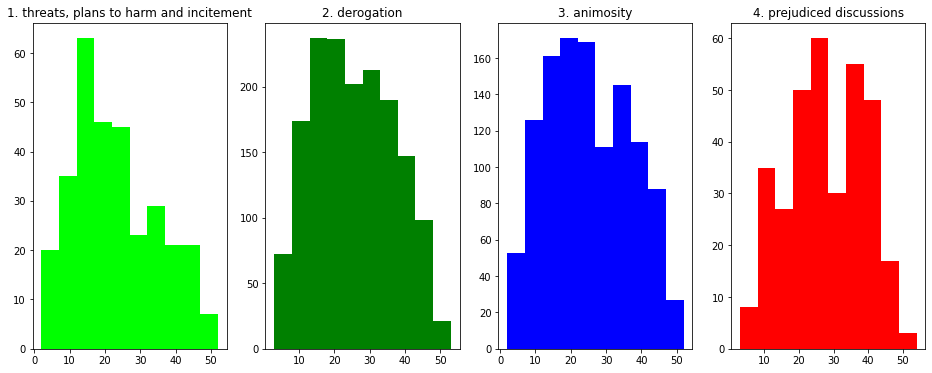

In [ ]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(16,6))


cat1 = train_data[train_data['label_category'] == '1. threats, plans to harm and incitement']['number_words']
ax1.hist(cat1,color=SENT_TO_COLOR_TASKB['1. threats, plans to harm and incitement'], density=False)
ax1.set_title('1. threats, plans to harm and incitement')


cat2 = train_data[train_data['label_category'] == '2. derogation']['number_words']
ax2.hist(cat2,color=SENT_TO_COLOR_TASKB['2. derogation'], density=False)
ax2.set_title('2. derogation')

cat3 = train_data[train_data['label_category'] == '3. animosity']['number_words']
ax3.hist(cat3,color=SENT_TO_COLOR_TASKB['3. animosity'], density=False)
ax3.set_title('3. animosity')


cat4 = train_data[train_data['label_category'] == '4. prejudiced discussions']['number_words']
ax4.hist(cat4,color=SENT_TO_COLOR_TASKB['4. prejudiced discussions'], density=False)
ax4.set_title('4. prejudiced discussions')



# Number of special characters

In [ ]:
special_characters = string.punctuation + string.digits

train_data['number_char'] = train_data['text'].apply(lambda x: len(x.replace(special_characters, "")))

### Task A

Text(0.5, 1.0, 'Not sexist label')

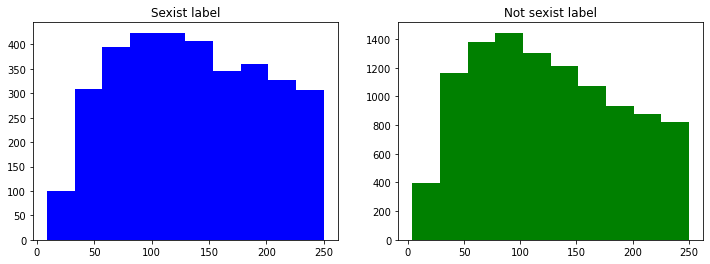

In [ ]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,4))


text_sexist = train_data[train_data['label_sexist'] == 'sexist']['number_char']

ax1.hist(text_sexist,color=SENT_TO_COLOR_TASKA['sexist'], density=False)
ax1.set_title('Sexist label')


text_not_sexist = train_data[train_data['label_sexist'] == 'not sexist']['number_char']

ax2.hist(text_not_sexist,color=SENT_TO_COLOR_TASKA['not sexist'], density=False)
ax2.set_title('Not sexist label')



### Task B

Text(0.5, 1.0, '4. prejudiced discussions')

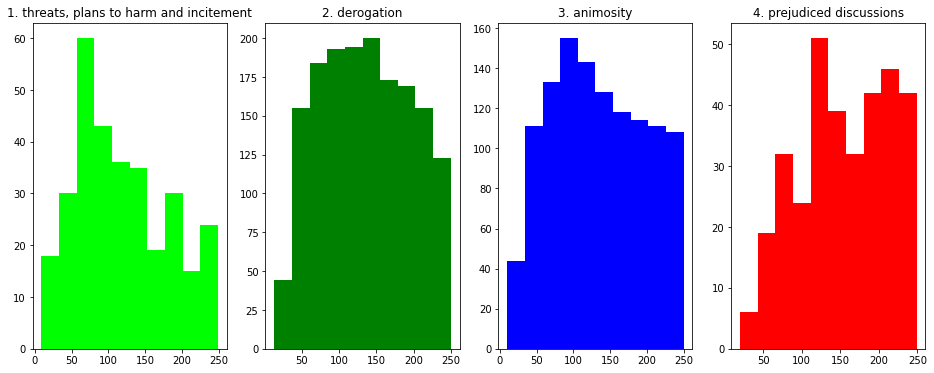

In [ ]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(16,6))


cat1 = train_data[train_data['label_category'] == '1. threats, plans to harm and incitement']['number_char']
ax1.hist(cat1,color=SENT_TO_COLOR_TASKB['1. threats, plans to harm and incitement'], density=False)
ax1.set_title('1. threats, plans to harm and incitement')


cat2 = train_data[train_data['label_category'] == '2. derogation']['number_char']
ax2.hist(cat2,color=SENT_TO_COLOR_TASKB['2. derogation'], density=False)
ax2.set_title('2. derogation')

cat3 = train_data[train_data['label_category'] == '3. animosity']['number_char']
ax3.hist(cat3,color=SENT_TO_COLOR_TASKB['3. animosity'], density=False)
ax3.set_title('3. animosity')


cat4 = train_data[train_data['label_category'] == '4. prejudiced discussions']['number_char']
ax4.hist(cat4,color=SENT_TO_COLOR_TASKB['4. prejudiced discussions'], density=False)
ax4.set_title('4. prejudiced discussions')



# Total Hashtags

In [ ]:
def total_hashtags_per_class(df, title, label_task, SENT_TO_COLOR):
  
  def get_total_tags(x: str):
    return len([link for link in x.split() if link.startswith('#')])
  
  df2 = df
  
  labels = SENT_TO_COLOR.keys()

  df2['TotalTags'] = df2['text'].apply(get_total_tags)
  total_per_class = df2.groupby(label_task)['TotalTags'].sum()
  print(total_per_class)
  X = np.arange(total_per_class.shape[0])
  plt.bar(labels, [total_per_class[label] for label in labels], color = [SENT_TO_COLOR[label] for label in labels])
  plt.title(title)
  plt.show()


### TASK A

label_sexist
not sexist    1763
sexist         319
Name: TotalTags, dtype: int64


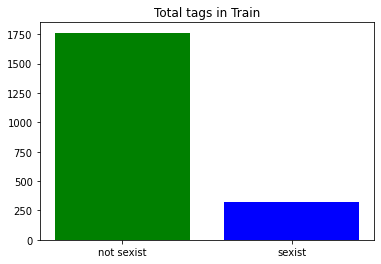

In [ ]:
total_hashtags_per_class(train_data, "Total tags in Train", 'label_sexist', SENT_TO_COLOR_TASKA)

### TASK B

label_category
1. threats, plans to harm and incitement      63
2. derogation                                108
3. animosity                                  95
4. prejudiced discussions                     53
none                                        1763
Name: TotalTags, dtype: int64


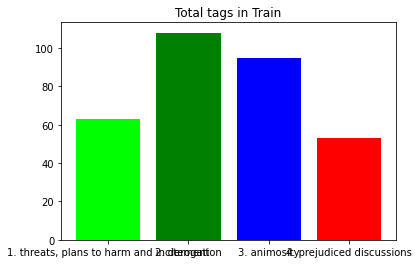

In [ ]:
total_hashtags_per_class(train_data, "Total tags in Train", 'label_category', SENT_TO_COLOR_TASKB)

# Total tags

In [ ]:
def total_tags_per_class(df, title, label_task, SENT_TO_COLOR):
  
  def get_total_tags(x: str):
    return len([link for link in x.split() if link.startswith('@')])
  
  df2 = df
  
  labels = SENT_TO_COLOR.keys()

  df2['TotalTags'] = df2['text'].apply(get_total_tags)
  total_per_class = df2.groupby(label_task)['TotalTags'].sum()
  print(total_per_class)
  X = np.arange(total_per_class.shape[0])
  plt.bar(labels, [total_per_class[label] for label in labels], color = [SENT_TO_COLOR[label] for label in labels])
  plt.title(title)
  plt.show()


### TASK A

label_sexist
not sexist    10
sexist         2
Name: TotalTags, dtype: int64


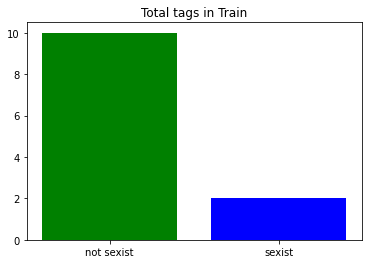

In [ ]:
total_tags_per_class(train_data, "Total tags in Train", 'label_sexist', SENT_TO_COLOR_TASKA)

### TASK B

label_category
1. threats, plans to harm and incitement     0
2. derogation                                0
3. animosity                                 2
4. prejudiced discussions                    0
none                                        10
Name: TotalTags, dtype: int64


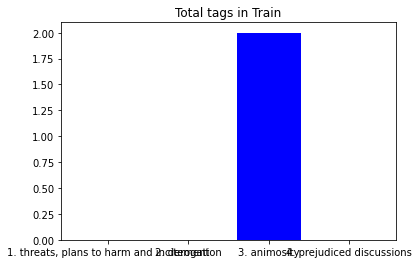

In [ ]:
total_tags_per_class(train_data, "Total tags in Train", 'label_category', SENT_TO_COLOR_TASKB)

# WordClouds


In [ ]:
def clean_tokenize_text(text, stopwords):
  new_text = re.sub(r'/\W+/g', '', text)
  tokens = word_tokenize(text)
  new_text = ' '.join([token.strip() for token in tokens if token.strip() not in stopwords])
  return new_text

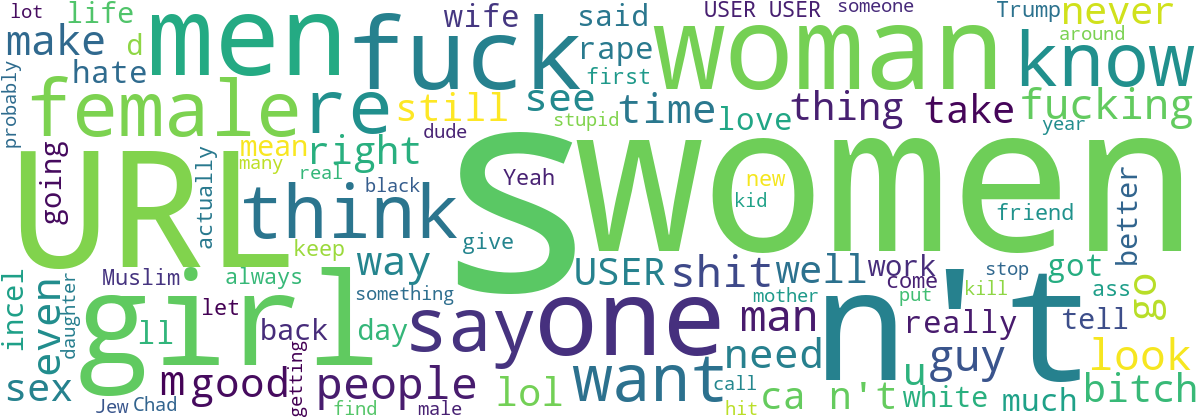

In [ ]:
STOPWORDS = STOPWORDS = set(stopwords.words("english"))
train__preprocessed = train_data['text'].apply(lambda x: clean_tokenize_text(x, STOPWORDS))

titles_train = ','.join(list(train__preprocessed.values))
wordcloud = WordCloud(max_words = 100, 
                      width = 1200, height = 420,
                      contour_width = 2, background_color = 'white')
wordcloud.generate(titles_train)
wordcloud.to_image()